In [134]:
import torch
import numpy as np
#from .biases.hamiltonian import ChainPendulum, Animation2d, MLE,MLE2
from .biases.datasets import RigidBodyDataset
from torchdiffeq import odeint
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
from .biases.systems.chain_pendulum import ChainPendulum
from .biases.systems.coupled_pendulum import CoupledPendulum
from .biases.systems.magnet_pendulum import MagnetPendulum
from .biases.systems.rotor import Rotor
from .biases.systems.gyroscope import Gyroscope
from .biases.systems.satellite import Satellite

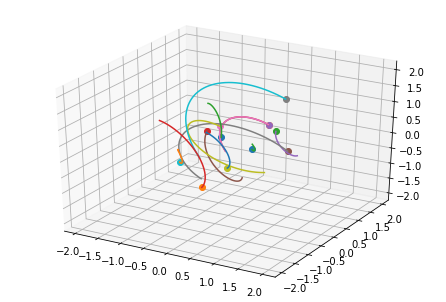

In [138]:
P = Satellite()
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,2,100))
HTML(P.animate(zt.data))

In [46]:
ztp = P.global2bodyCoords(zt[0])

In [47]:
ztp[:,1,[0,2]].abs()>10

IndexError: index 2 is out of bounds for dimension 0 with size 2

IndexError: index 2 is out of bounds for dimension 0 with size 2

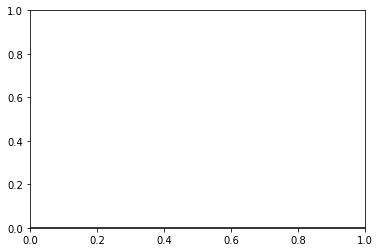

In [48]:
t = np.linspace(0,10,200)
plt.axhline(c='k')
plt.plot(t,ztp[:,0,[0,2]].T[0]%(2*np.pi))
plt.plot(t,ztp[:,1,[0,2]].T[0])
plt.plot(t,ztp[:,0,1]-np.pi)

plt.ylim((-8,8))
plt.xlabel("Time (s)")
plt.legend(["0",r"$\phi$",r"$\dot{\phi}$",r"$\theta - \pi$"])

Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'


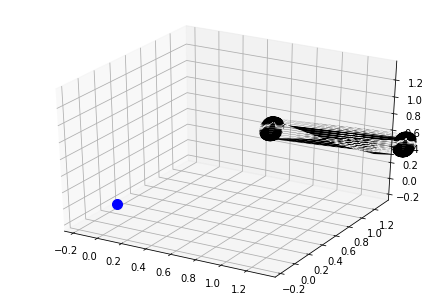

In [120]:
P = Rotor()
z0 = P.sample_initial_conditions(100)
zt = P.integrate(z0,torch.linspace(0,5,100))
HTML(P.animate(zt.data))

In [132]:
N=5
for i in range(N):
    for k in range(N-i-1,N):
        print((k-1,k))
    print("\n")

(3, 4)


(2, 3)
(3, 4)


(1, 2)
(2, 3)
(3, 4)


(0, 1)
(1, 2)
(2, 3)
(3, 4)


(-1, 0)
(0, 1)
(1, 2)
(2, 3)
(3, 4)




In [69]:
import pickle
from .biases.train import makeTrainer
from .biases.models import HNN,LNN,NN,CHNN,CHLC,CH,CL,CLNN

In [70]:
# with open("/home/marc_f/hamiltonian-biases/biases/runs/May04_12-10-28_mint/checkpoints/c100.state",'rb') as f:
#     ckpt = pickle.load(f)

In [71]:
trainer = makeTrainer(network=CHNN,body=ChainPendulum(3))

CH ignores angular_dims
CH currently assumes potential energy depends only on q
CH currently assumes time independent Hamiltonian
CH assumes positions q are in Cartesian coordinates


In [72]:
trainer.load_checkpoint("/home/marc_f/hamiltonian-biases/biases/runs/May04_14-14-32_mint/checkpoints/c100.state")

In [73]:
mb = next(iter(trainer.dataloaders['test']))

In [78]:
mb[1][0].shape

torch.Size([5, 2, 3, 2])

In [79]:
xpt_gt = mb[1][0]
xpt_gt[:,1] = trainer.model.M@xpt_gt[:,1]

In [80]:
trainer.dataloaders["test"].dataset.body.hamiltonian(None,xpt_gt.reshape(5,-1).cpu().double())

tensor([-1.8730, -1.8048, -1.7395, -1.6818, -1.6351], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [77]:
trainer.model.H(None,mb[1][0].reshape(5,-1).cuda().float())

tensor([4.6640, 4.5660, 4.4722, 4.3892, 4.3220], device='cuda:0',
       grad_fn=<AddBackward0>)

In [ ]:
trainer.model.integrate(mb[0])

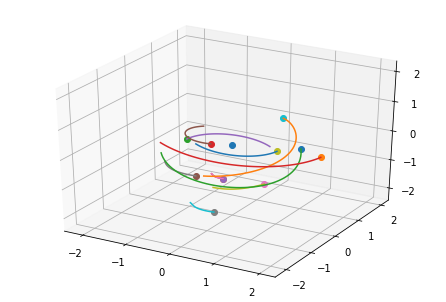

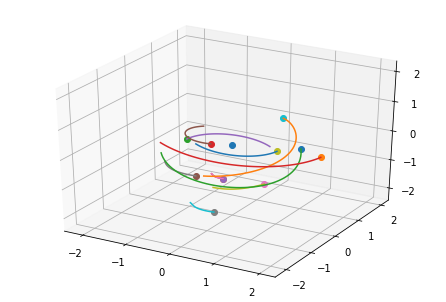

In [32]:
P = Satellite()
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,2,100))
HTML(P.animate(zt.data-zt[:,:,:,:1].data))

In [11]:
zt = P.integrate(z0,torch.linspace(0,3,300),tol=1e-5,method="rk4")


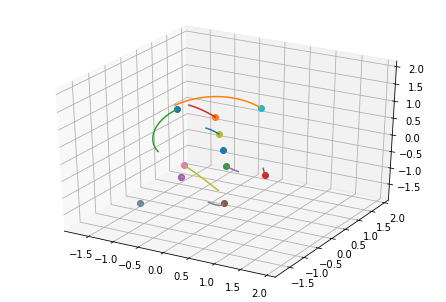

In [12]:
HTML(P.animate(zt.data-zt.data[:,:,:,:1]))

In [ ]:
P = Gyroscope()
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,5,250))
HTML(P.animate(zt.data))#x))

Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'


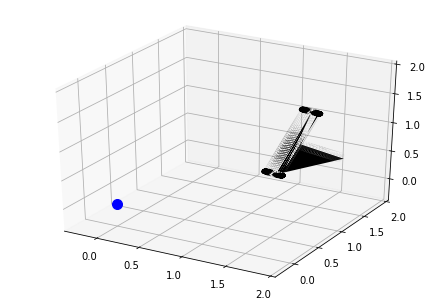

In [27]:
P = Rotor()
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,10,100))
HTML(P.animate(zt.data))#x

In [60]:
verts,tris = P.obj
from .biases.utils import compute_moments
v,mu,C = compute_moments(torch.from_numpy(verts[tris]))

In [61]:
np.linalg.eigh(C)

(array([2.36900399e-05, 3.34974389e-04, 7.67675810e-04]),
 array([[ 1.00000000e+00, -7.41491384e-08, -7.96827253e-06],
        [ 7.96860282e-06,  7.38444863e-03,  9.99972735e-01],
        [-1.53058176e-08, -9.99972735e-01,  7.38444863e-03]]))

In [35]:
np.diag(C)

array([2.40667466e-05, 7.31290344e-04, 3.03607612e-04])

In [31]:
np.linalg.eigh(torch.diag(C).sum()*torch.eye(3)-C)

(array([0.00025424, 0.00075537, 0.00096148]),
 array([[-8.09356221e-06,  2.73988016e-07, -1.00000000e+00],
        [ 9.99989831e-01, -4.50974846e-03, -8.09471553e-06],
        [ 4.50974846e-03,  9.99989831e-01,  2.37485300e-07]]))

In [53]:
torch.randint(2,size=(3,))

tensor([0, 0, 1])

tensor([0, 0, 1])

In [8]:
zt.shape

torch.Size([1, 300, 2, 4, 3])

torch.Size([1, 300, 2, 4, 3])

In [27]:
R = (zt[0,:,0,1:]-zt[0,:,0,:1])

In [30]:
(R.permute(0,2,1)@R - torch.eye(3)).abs().mean()

tensor(1.2226e-06)

tensor(1.2226e-06)

In [22]:
from .biases.utils import read_obj
verts,tris =read_obj("gyro.obj")

In [33]:
verts.shape

(128, 2)

(128, 2)

In [24]:
verts.shape

(128, 2)

(128, 2)

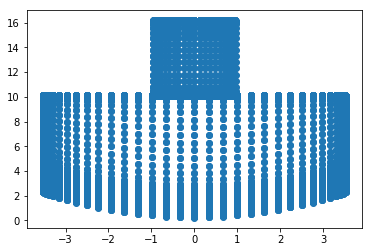

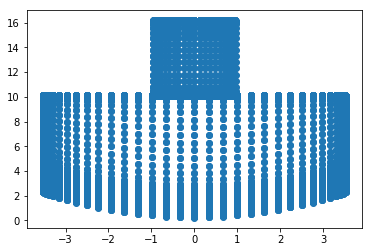

In [26]:
plt.scatter(*verts.T[[0,2]])

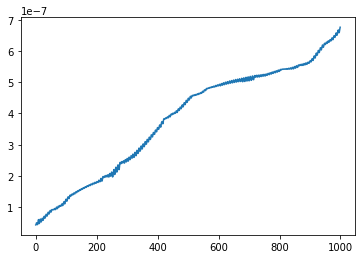

In [9]:
Q = zt[0,:,0,1:]-zt[0,:,0,:1]
plt.plot((Q@Q.permute(0,2,1) - torch.eye(3)).abs().mean(dim=(-1,-2)))

In [10]:
Q@Q.permute(0,2,1)

tensor([[[ 1.0000e+00,  1.5850e-08,  1.5232e-08],
         [ 1.5850e-08,  1.0000e+00, -6.9731e-08],
         [ 1.5232e-08, -6.9731e-08,  1.0000e+00]],

        [[ 1.0000e+00,  1.6440e-08,  1.7847e-08],
         [ 1.6440e-08,  1.0000e+00, -7.0803e-08],
         [ 1.7847e-08, -7.0803e-08,  1.0000e+00]],

        [[ 1.0000e+00,  1.9591e-08,  2.8540e-08],
         [ 1.9591e-08,  1.0000e+00, -7.5662e-08],
         [ 2.8540e-08, -7.5662e-08,  1.0000e+00]],

        ...,

        [[ 1.0000e+00, -9.2234e-09,  1.0741e-07],
         [-9.2234e-09,  1.0000e+00, -1.3203e-07],
         [ 1.0741e-07, -1.3203e-07,  1.0000e+00]],

        [[ 1.0000e+00, -1.2924e-08,  1.0897e-07],
         [-1.2924e-08,  1.0000e+00, -1.3222e-07],
         [ 1.0897e-07, -1.3222e-07,  1.0000e+00]],

        [[ 1.0000e+00, -1.8985e-08,  1.3361e-07],
         [-1.8985e-08,  1.0000e+00, -1.3966e-07],
         [ 1.3361e-07, -1.3966e-07,  1.0000e+00]]], dtype=torch.float64)

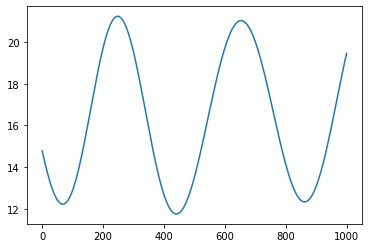

In [55]:
plt.plot(P.hamiltonian(1,zt[0].reshape(zt.shape[1],-1)))

In [51]:
zt.shape

torch.Size([1, 100, 2, 2, 2])

In [52]:
P.hamiltonian(1,zt[0].reshape(zt.shape[1],-1))

tensor([-1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.54

In [3]:
import numpy as np

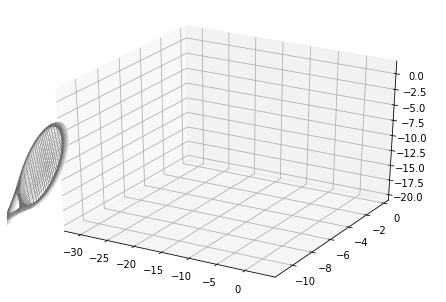

In [7]:
P = Rotor()
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,30,400))
HTML(P.animate(zt.data))

In [143]:
import numpy as np
def read_obj(filename):
    triangles = []
    vertices = []
    with open(filename) as file:
        for line in file:
            components = line.strip(' \n').split(' ')
            if components[0] == "f": # face data
                # e.g. "f 1/1/1/ 2/2/2 3/3/3 4/4/4 ..."
                indices = list(map(lambda c: int(c.split('/')[0]) - 1, components[1:]))
                for i in range(0, len(indices) - 2):
                    triangles.append(indices[i: i+3])
            elif components[0] == "v": # vertex data
                # e.g. "v  30.2180 89.5757 -76.8089"
                #print(components)
                vertex = list(map(lambda c: float(c), components[1:]))
                vertices.append(vertex)
    return np.array(vertices), np.array(triangles)

In [140]:
import matplotlib.pyplot as plt
vertices, triangles = read_obj("10540_Tennis_racket_V2_L3.obj")
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]
ax = plt.axes(projection='3d')
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_zlim([-30, 30])
tri = ax.plot_trisurf(x, z, triangles, y, shade=True, color='white')

FileNotFoundError: [Errno 2] No such file or directory: '10540_Tennis_racket_V2_L3.obj'

In [25]:
vertices.shape

(6148, 3)

In [26]:
triangles.shape

(12288, 3)

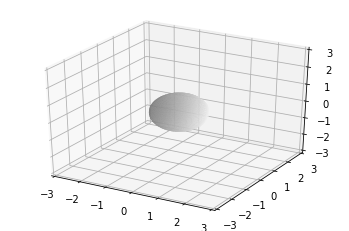

In [144]:
#from .biases.utils import read_obj
vertices, triangles = read_obj("sphere.obj")
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]
ax = plt.axes(projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
tri = ax.plot_trisurf(x, z, triangles, y, shade=True, color='white')

In [131]:
vertices.shape

NameError: name 'vertices' is not defined

In [22]:
triangles.shape

(20480, 3)

In [28]:
vertices[triangles].shape

(12288, 3, 3)

In [145]:
print(vertices[0:3])
print(triangles[0])

[[ 0.525731  0.       -0.850651]
 [ 0.525731  0.        0.850651]
 [-0.525731  0.        0.850651]]
[22 23 24]


In [146]:
vertices[triangles][0]

array([[-0.0206686, -0.367868 , -0.929648 ],
       [ 0.       , -0.334425 , -0.942422 ],
       [ 0.0206686, -0.367868 , -0.929648 ]])

In [147]:
np.sqrt((vertices**2).sum(-1))

array([1.0000001 , 1.0000001 , 1.0000001 , ..., 0.99999984, 1.0000004 ,
       1.0000001 ])

In [18]:
from .biases.utils import read_obj
vertices, triangles = read_obj("rotor.obj")

Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'


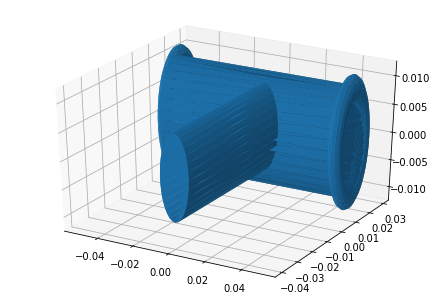

In [24]:
x,y,z = vertices.T
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1],projection='3d')
ax.axis('equal')
ax.plot_trisurf(x,y,triangles,z)

In [15]:
%debug

> /home/marc/hamiltonian-biases/biases/utils.py(87)read_obj()
     85     import pywavefront
     86     scene = pywavefront.Wavefront(filename,collect_faces=True)
---> 87     assert len(scene.mesh_list)==1, "multiple objects?"
     88     return np.array(scene.vertices), np.array(scene.mesh_list[0].faces)
     89 # def read_obj(filename):

ipdb> print(scene.mesh_list)
[<pywavefront.mesh.Mesh object at 0x7f57b2649e10>, <pywavefront.mesh.Mesh object at 0x7f57b27de550>, <pywavefront.mesh.Mesh object at 0x7f57b27da390>, <pywavefront.mesh.Mesh object at 0x7f57b2670ed0>]
ipdb> dir(scene)
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_mesh', 'file_name', 'materials', 'mesh_list', 'meshes', 'mtl

In [121]:
vertices = np.roll(vertices,-1,axis=1)

In [4]:
def Vols(mesh_verts):
    """ computes the volume of an obj from vertices of the boundary mesh"""
    #(num verts, verts per triangle, xyz)
    return mesh_verts.det()/6
    
def Coms(mesh_verts):
    """ (bs,n,d) -> (bs,d)"""
    return mesh_verts.sum(1)/4

def ExxT(V,mu):
    """ (bs,n,d), (bs,d) -> (bs,d,d)"""
    return (V.permute(0,2,1)@V)/20+(4/5)*mu[:,None]*mu[:,:,None]
    
def compute_moments(mesh_verts):
    " (bs,n,d)"
    with torch.no_grad():
        vols = Vols(mesh_verts)
        Vol = vols.sum()
        weights = vols/Vol
        coms = Coms(mesh_verts)
        Com = (coms*weights[:,None]).sum(0)
        xxT = (ExxT(mesh_verts,coms)*weights[:,None,None]).sum(0)
        covar = xxT-Com[None,:]*Com[:,None]
        return Vol,Com,covar

In [5]:
v,mu,C = compute_moments((torch.from_numpy(vertices[triangles])))

In [6]:
lam,V = np.linalg.eigh(C.numpy())
print(lam)

[0.33333333 0.33333333 0.33333333]


In [10]:
print(mu,C)

tensor([0., 0., 0.], dtype=torch.float64) tensor([[0.3333, 0.0000, 0.0000],
        [0.0000, 0.3333, 0.0000],
        [0.0000, 0.0000, 0.3333]], dtype=torch.float64)


In [11]:
V@(np.diag(lam)@V.T)

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333]])

In [12]:
V.T@C.numpy()@V

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333]])

In [86]:
compute_moments((torch.from_numpy(((vertices-mu[None,:].numpy()))[triangles])))

(tensor(31.5356, dtype=torch.float64),
 tensor([-0.4636, -0.4364,  1.0331], dtype=torch.float64),
 tensor([[ 0.2789, -0.0225,  0.0259],
         [-0.0225,  5.1821,  0.5970],
         [ 0.0259,  0.5970,  1.1061]], dtype=torch.float64))

In [87]:
compute_moments((torch.from_numpy(vertices[triangles])))

(tensor(31.5356, dtype=torch.float64),
 tensor([0.0016, 0.7841, 1.4384], dtype=torch.float64),
 tensor([[ 2.8820e-01, -1.4425e-03, -6.4770e-04],
         [-1.4425e-03,  4.9481e+00,  5.5103e-01],
         [-6.4770e-04,  5.5103e-01,  1.1484e+00]], dtype=torch.float64))

In [72]:
compute_moments((torch.from_numpy(vertices[triangles])+3*torch.ones(3)[None,None]))

(tensor(3.1530e-05, dtype=torch.float64),
 tensor([3.3244, 2.6076, 3.0849], dtype=torch.float64),
 tensor([[-0.4945,  0.1777, -0.2621],
         [ 0.1777,  0.3171,  0.2286],
         [-0.2621,  0.2286, -0.0864]], dtype=torch.float64))

In [73]:
compute_moments((torch.from_numpy((vertices+1)[triangles])+3*torch.ones(3)[None,None]))

(tensor(3.1528e-05, dtype=torch.float64),
 tensor([4.4326, 3.4742, 4.1085], dtype=torch.float64),
 tensor([[-0.8793,  0.3148, -0.4650],
         [ 0.3148,  0.5649,  0.4052],
         [-0.4650,  0.4052, -0.1552]], dtype=torch.float64))

In [169]:
(Coms(torch.from_numpy(vertices[triangles]))**2).sum(-1).sqrt()

tensor([0.7498, 0.7498, 0.7498,  ..., 0.7498, 0.7498, 0.7498],
       dtype=torch.float64)

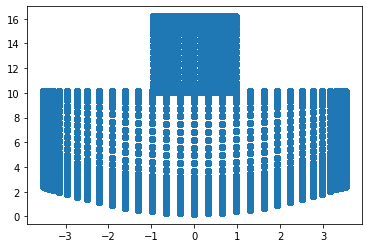

In [15]:
plt.scatter(*vertices[triangles].reshape(-1,3)[:,1:3].T)

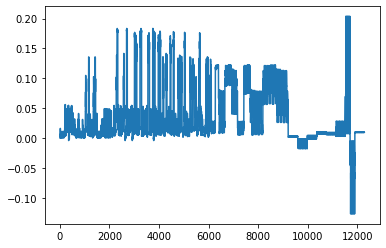

In [11]:
import matplotlib.pyplot as plt
plt.plot(Vols(torch.from_numpy(vertices[triangles])))

In [ ]:
P = MagnetPendulum(q=.05,magnets=5)
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,30,400))
HTML(P.animate(zt.data))

In [5]:
z0 = P.sample_initial_conditions(1)

In [6]:
angles_vel = torch.randn(3,2,2,1)
z0 = P.body2globalCoords(angles_vel)
angles_vel2 = P.global2bodyCoords(z0)

In [7]:
((angles_vel2[:,1]-angles_vel[:,1])**2).mean()/((angles_vel2+angles_vel)**2).mean()

tensor(1.5961)

In [8]:
(z0[0,0,0]**2).sum()

tensor(1.)

In [9]:
(z0[0,1,0]*z0[0,0,0]).sum()

tensor(0.)

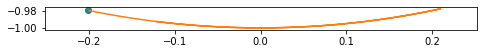

In [39]:
P = ChainPendulum(1,m=1)
z0 = P.sample_initial_conditions(5)
zt = P.integrate(z0,torch.linspace(0,10,100).double())
HTML(P.animate(zt.data))

In [40]:
#at = P.global2bodyCoords(zt.reshape(-1,*z0.shape[1:])).reshape(*zt.shape[:-1])

In [41]:
#plt.plot(at[:,:,0,0].T,at[:,:,1,0].T);

In [42]:
#plt.plot(at[:,:,0,0].T,at[:,:,1,0].T);

In [8]:
from scipy.spatial.transform import Rotation
import torch
import numpy as np

In [274]:
# Hodge star on R3
def flip(x, dim):
    dim = x.dim() + dim if dim < 0 else dim
    return x[tuple(slice(None, None) if i != dim
             else torch.arange(x.size(i)-1, -1, -1).long()
             for i in range(x.dim()))]

def cross_matrix(k):
    """Application of hodge star on R3, mapping Λ^1 R3 -> Λ^2 R3"""
    K = torch.zeros(*k.shape[:-1],3,3,device=k.device,dtype=k.dtype)
    K[...,0,1] = -k[...,2]
    K[...,0,2] = k[...,1]
    K[...,1,0] = k[...,2]
    K[...,1,2] = -k[...,0]
    K[...,2,0] = -k[...,1]
    K[...,2,1] = k[...,0]
    return K

def uncross_matrix(K):
    """Application of hodge star on R3, mapping Λ^2 R3 -> Λ^1 R3"""
    k = torch.zeros(*K.shape[:-1],device=K.device,dtype=K.dtype)
    k[...,0] = (K[...,2,1] - K[...,1,2])/2
    k[...,1] = (K[...,0,2] - K[...,2,0])/2
    k[...,2] = (K[...,1,0] - K[...,0,1])/2
    return k

def eulerdot2omega(euler):
    """(bs,3) -> (bs,3,3) matrix"""
    bs,_ = euler.shape
    M = torch.zeros(bs,3,3,device=euler.device,dtype=euler.dtype)
    phi,theta,psi = euler.T
    M[:,0,0] = theta.sin()*psi.sin()
    M[:,0,1] = psi.cos()
    M[:,1,0] = theta.sin()*psi.cos()
    M[:,1,1] = -psi.sin()
    M[:,2,0] = theta.cos()
    M[:,2,2] = 1
    return M

def euler2frame(euler_and_dot):
    """ input: (bs,2,3)
        output: (bs,2,3,3)"""
    euler,eulerdot = euler_and_dot.permute(1,0,2)
    omega = (eulerdot2omega(euler)@eulerdot.unsqueeze(-1)).squeeze(-1)
    # omega = (angular velocity in the body frame)
    RT_Rdot = cross_matrix(omega) 
    R = torch.from_numpy(Rotation.from_euler('ZXZ',euler.data.numpy()).as_matrix()).to(euler.device,euler.dtype)
    Rdot = R@RT_Rdot
    return torch.stack([R,Rdot],dim=1).permute(0,1,3,2) # (bs,2,d,n->bs,2,n,d)

def frame2euler(frame_pos_vel):
    """ input: (bs,2,3,3)
        output: (bs,2,3)"""
    R,Rdot = frame_pos_vel.permute(1,0,3,2)#frame_pos_vel[:,0,1:].permute(0,2,1)-frame_pos_vel[:,0,0].unsqueeze(-1) #(bs,3,3)
    #Rdot = frame_pos_vel[:,1,1:].permute(0,2,1)-frame_pos_vel[:,1,0].unsqueeze(-1) #(bs,3,3)
    omega = uncross_matrix(R.permute(0,2,1)@Rdot) #angular velocity in body frame Omega = RTRdot
    angles = torch.from_numpy(np.ascontiguousarray(Rotation.from_matrix(R.data.numpy()).as_euler('ZXZ'))).to(R.device,R.dtype)
    eulerdot = torch.solve(omega.unsqueeze(-1),eulerdot2omega(angles))[0].squeeze(-1)
    return torch.stack([angles,eulerdot],dim=1)

In [275]:
eps = 1e-3
euler_and_dot = torch.randn(1,2,3)
#euler_and_dot[:,1,:2]=0
euler_and_dot_advanced = euler_and_dot.clone()
euler_and_dot_advanced[:,0] += eps*euler_and_dot[:,1]
frame = euler2frame(euler_and_dot)
frame[:,0] += eps*frame[:,1]
euler_advanced2 = frame2euler(frame)
print((euler_and_dot_advanced[:,0]-euler_advanced2[:,0])/eps)
print((euler2frame(euler_and_dot_advanced)[:,0]-frame[:,0])/eps)

tensor([[-3141.5928, -1283.8604, -3141.5923]])
tensor([[[-5.9605e-05,  1.1921e-04, -1.1176e-04],
         [ 5.9605e-05,  8.9407e-05,  5.9605e-05],
         [-1.7881e-04, -7.4506e-05, -5.9605e-05]]])


In [276]:
print(euler_and_dot[:,0])
print(euler_and_dot_advanced[:,0])
print(euler_advanced2[:,0])

tensor([[-1.9532, -0.6422, -0.1824]])
tensor([[-1.9526, -0.6419, -0.1828]])
tensor([[1.1890, 0.6419, 2.9588]])


In [273]:
print(euler2frame(euler_and_dot)[:,0])
print(euler2frame(euler_and_dot_advanced)[:,0])
print(frame[:,0])

tensor([[[ 0.8469,  0.5197, -0.1124],
         [-0.3402,  0.6922,  0.6365],
         [ 0.4086, -0.5008,  0.7631]]])
tensor([[[ 0.8469,  0.5196, -0.1128],
         [-0.3399,  0.6922,  0.6367],
         [ 0.4089, -0.5009,  0.7628]]])
tensor([[[ 0.8469,  0.5196, -0.1128],
         [-0.3399,  0.6922,  0.6367],
         [ 0.4089, -0.5009,  0.7628]]])


In [77]:
euler_and_dot = torch.randn(1,2,3)
euler_and_dot[:,1] = 0
euler_and_dot[:,1,0] =1
e2 = euler_and_dot.clone()
e2[:,0] += .005*e2[:,1]
euler_and_dot_traj = torch.cat([euler_and_dot,e2],dim=0)
frame = euler2frame(euler_and_dot_traj)

In [78]:
frame2euler(frame)-euler_and_dot_traj

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 1.1921e-07,  5.4352e-09, -8.6669e-08]],

        [[-1.4901e-08,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  5.0258e-11, -1.9422e-08]]])

In [40]:
A = -cross_matrix(torch.tensor([1e-3,0.,0.]))
frame[1] += frame[1]@A
euler_back =frame2euler(frame)
print(euler_back[1]-euler_back[0])

tensor([[ 0.0010, -0.0019, -0.0012],
        [ 0.0000,  0.0000,  0.0000]])


In [35]:
frame[0,0]

tensor([[-0.6406,  0.5169, -0.5678],
        [-0.4732, -0.8481, -0.2383],
        [-0.6047,  0.1160,  0.7879]])

In [36]:
print(frame[1,0]-frame[0,0])
print((frame[1,0]-frame[0,0])/frame[0,1])

tensor([[-0.0028,  0.0005,  0.0036],
        [-0.0012,  0.0002,  0.0015],
        [ 0.0039, -0.0007,  0.0031]])
tensor([[-0.0053,  0.0024, -0.0093],
        [-0.0053,  0.0024, -0.0020],
        [-0.0053,  0.0024, -0.0060]])


In [241]:
print(frame[0,1])

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0., -1.,  0.]])


In [193]:
frame[1,1]@frame[1,0].T

tensor([[-1.3562e-08,  4.6989e-09, -9.9293e-01],
        [ 1.5844e-09, -3.0165e-10,  1.1872e-01],
        [ 9.9293e-01, -1.1872e-01,  8.5151e-09]])

In [85]:
frame[0,0]

tensor([[-0.0286, -0.5461,  0.8373],
        [ 0.9708,  0.1844,  0.1534],
        [-0.2381,  0.8172,  0.5249]])

In [86]:
frame[1,0]

tensor([[-0.0241, -0.4599,  0.8877],
        [ 0.9716,  0.1985,  0.1292],
        [-0.2356,  0.8655,  0.4420]])

In [75]:
euler_and_dot_traj[:,0]

tensor([[-0.0680, -1.4323,  1.1169],
        [ 0.0320, -1.4323,  1.1169]])

In [48]:
e2[:,0]

tensor([[ 9.9891, -3.4993, 10.3205]])

In [6]:
r = R.from_euler('zyx', [[90, 0, 0],[0, 45, 0],[45, 60, 30]], degrees=True)

In [9]:
r.as_matrix().shape

(3, 3, 3)

In [4]:
import torch
x = torch.randn(3)
torch.cat([x.sum()[None],x])

tensor([ 0.0877,  0.8217, -0.0012, -0.7328])

In [10]:
r[0].as_dcm()

array([[ 2.22044605e-16, -1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [28]:
P = ChainPendulum(8)
z0 = P.sample_initial_conditions(1).double()
bs = z0.shape[0]
xp = torch.stack([z0[:,0].double(),P.M@z0[:,1].double()],dim=1).reshape(bs,-1)
ts = torch.linspace(0,100,100).double()
es = MLE2(xp,P.dynamics(wgrad=True),ts,rtol=1e-4)

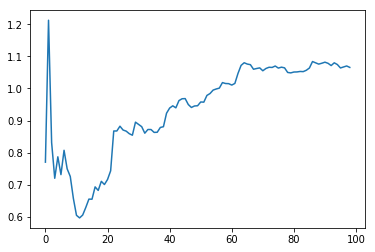

In [29]:
plt.plot(es[1:,0,-1]/ts[1:])

In [26]:
es[1:,0,-1]/ts[1:]

tensor([0.3096, 0.4782, 0.4265, 0.4239, 0.4710, 0.4626, 0.4632, 0.4701, 0.4531,
        0.4529, 0.4555, 0.4560, 0.4426, 0.4160, 0.4254, 0.4259, 0.4292, 0.4243,
        0.4297, 0.4153, 0.4112, 0.4208, 0.4308, 0.4294, 0.4299, 0.4276, 0.4272,
        0.4239, 0.4057, 0.4066, 0.4076, 0.4105, 0.4177, 0.4211, 0.4213, 0.4229,
        0.4230, 0.4229, 0.4200, 0.4260, 0.4254, 0.4258, 0.4270, 0.4256, 0.4228,
        0.4231, 0.4235, 0.4240, 0.4213, 0.4195, 0.4192, 0.4170, 0.4166, 0.4164,
        0.4193, 0.4207, 0.4229, 0.4163, 0.4173, 0.4175, 0.4205, 0.4248, 0.4276,
        0.4282, 0.4252, 0.4265, 0.4270, 0.4230, 0.4195, 0.4221, 0.4192, 0.4190,
        0.4190, 0.4233, 0.4232, 0.4259, 0.4287, 0.4287, 0.4322, 0.4332, 0.4295,
        0.4273, 0.4307, 0.4279, 0.4265, 0.4278, 0.4281, 0.4287, 0.4290, 0.4267,
        0.4285, 0.4293, 0.4321, 0.4336, 0.4338, 0.4355, 0.4331, 0.4328, 0.4318],
       dtype=torch.float64)

In [33]:
P = ChainPendulum(6)
z0s = P.sample_initial_conditions(1).double()
ts = torch.linspace(0,100,10000).double()
zt = P.integrate(z0s,ts).float()

In [34]:
xp = torch.stack([zt[0,:,0].double(),P.M@zt[0,:,1].double()],dim=1).reshape(ts.shape[0],-1)
D = xp.shape[-1]

In [35]:
exps = MLE(xp,ts,P.dynamics(wgrad=True))#,v0=xp[0])

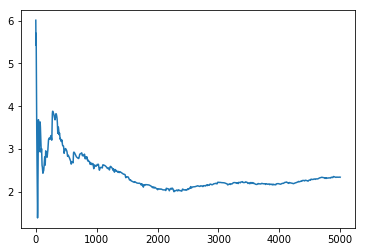

In [36]:
plt.plot(np.cumsum(exps[::-1][:5000])/(1+np.arange(5000)))

In [32]:
(np.cumsum(exps[::-1][:5000])/(1+np.arange(5000)))[-100:]

array([0.02083264, 0.02083721, 0.02084123, 0.02084469, 0.02084759,
       0.02084995, 0.02085177, 0.02085305, 0.02085378, 0.02085398,
       0.02085363, 0.02085274, 0.0208513 , 0.0208493 , 0.02084673,
       0.02084359, 0.02083987, 0.02083555, 0.02083062, 0.02082507,
       0.02081888, 0.02081203, 0.02080451, 0.02079629, 0.02078737,
       0.0207777 , 0.02076728, 0.02075608, 0.02074408, 0.02073124,
       0.02071754, 0.02070297, 0.02068747, 0.02067104, 0.02065364,
       0.02063524, 0.02061581, 0.02059531, 0.02057373, 0.02055102,
       0.02052716, 0.02050211, 0.02047584, 0.02044833, 0.02041953,
       0.02038943, 0.02035798, 0.02032516, 0.02029095, 0.0202553 ,
       0.02021819, 0.0201796 , 0.0201395 , 0.02009787, 0.02005468,
       0.0200099 , 0.01996353, 0.01991553, 0.01986589, 0.0198146 ,
       0.01976163, 0.01970699, 0.01965065, 0.01959261, 0.01953286,
       0.01947139, 0.01940822, 0.01934332, 0.01927671, 0.0192084 ,
       0.01913838, 0.01906666, 0.01899327, 0.01891821, 0.01884

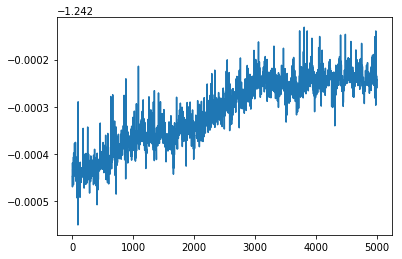

In [29]:
plt.plot(P.hamiltonian(ts,xp))

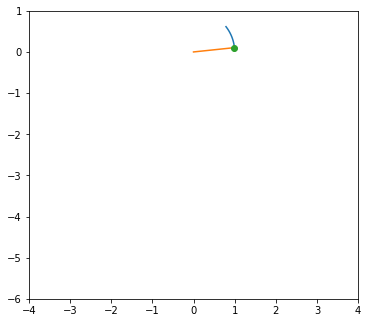

In [17]:
xt = zt[0,:,0,:].permute(1,2,0).cpu()
HTML(Animation2d(xt.float(),P,box_lim=(-4,4,-6,1)).animate().to_html5_video())

In [13]:
# points = torch.cat([torch.tensor([[0.],[0.]]),ic[0,0].T],dim=1)
# plt.plot(*points)
# plt.quiver(*ic[0,0].T,*ic[0,1].T)
# # plt.ylim(-3,0.5)
# # plt.xlim(-2,2.5)
# plt.axes().set_aspect('equal', 'datalim')

In [51]:
body = ChainPendulum(5,beams=False)
z0 = body.sample_initial_conditions(1)
z0[:,1] = body.M@z0[:,1]*2#*.01
bs,_,n,d = z0.shape
z0 = z0.reshape(bs,2*n*d)

In [88]:
body.sample_initial_conditions(1).shape

torch.Size([1, 2, 5, 2])

In [86]:
body.__class__

core.hamiltonian.ChainPendulum

In [54]:
ts = torch.linspace(0,50,1000)
dynamics = EuclideanAndGravityDynamics(body)
with torch.no_grad():
    zs = odeint(dynamics, z0, ts, rtol=1e-6, method='rk4').permute(1, 0, 2)


In [55]:
zs.shape

torch.Size([1, 1000, 20])

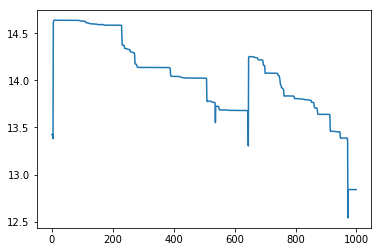

In [56]:
plt.plot(GravityHamiltonian(body.M,body.Minv,None,zs[0]))

In [38]:
zt.shape

torch.Size([1, 5000, 2, 1, 2])

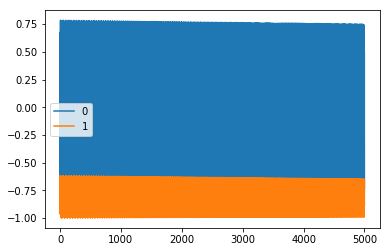

In [39]:
# xt = zs[0,:,:n*d].reshape(len(ts),n,d).permute(1,2,0)
# pt = zs[0,:,n*d:].reshape(len(ts),n,d).permute(1,2,0)
n = len(P.body_graph.nodes)
d=2
for i in range(n*d):
    plt.plot(zt[0,:,0,0,i])
plt.legend(range(n*d))

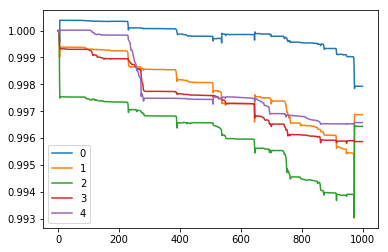

In [58]:
plt.plot((xt[0]**2).sum(0))
for i in range(n-1):
    plt.plot(((xt[1:]-xt[:-1])[i]**2).sum(0))
plt.legend(range(n))
#plt.yscale('log')

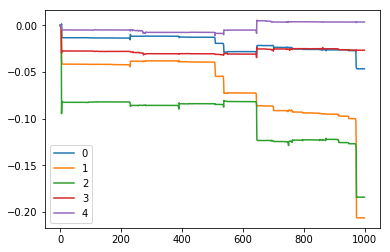

In [59]:
plt.plot((pt[0]*xt[0]).sum(0))
for i in range(n-1):
    plt.plot(((pt[1:]-pt[:-1])[i]*(xt[1:]-xt[:-1])[i]).sum(0))
plt.legend(range(n))
#plt.yscale('log')

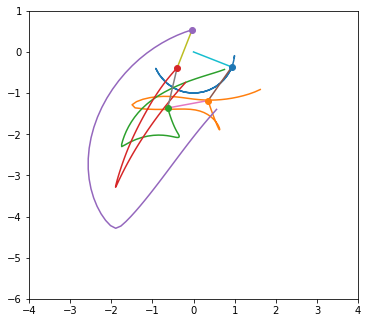

In [60]:
HTML(Animation2d(xt,body,box_lim=(-4,4,-6,1)).animate().to_html5_video())

In [42]:
body.body_graph.nodes[0]['m']

KeyError: 'm'

In [44]:
[n for n in body.body_graph.nodes.items()]

[(0, {'tether': tensor([0., 0.]), 'l': 1}), (1, {}), (2, {})]

In [64]:
def tril_mask(value):
    n = value.size(-1)
    coords = value.new(n)
    torch.arange(n, out=coords)
    return coords <= coords.view(n, 1)

In [69]:
tril_mask(torch.eye(3)).float()@tril_mask(torch.eye(3)).float().T

tensor([[1., 1., 1.],
        [1., 2., 2.],
        [1., 2., 3.]])

In [70]:
torch.nn.Parameter(torch.eye(3))

Parameter containing:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], requires_grad=True)

In [71]:
a = torch.randn(3, 3)
a = torch.mm(a, a.t()) + 1e-05 * torch.eye(3) # make symmetric positive definite
torch.cholesky(a)

tensor([[ 1.8690,  0.0000,  0.0000],
        [-0.8443,  1.0068,  0.0000],
        [-1.8397,  0.0835,  0.9305]])

In [72]:
tril_mask(a)*a

tensor([[ 3.4932, -0.0000, -0.0000],
        [-1.5780,  1.7265,  0.0000],
        [-3.4385,  1.6373,  4.2575]])

In [81]:
_m_lower = torch.nn.Parameter(.1*torch.randn(3,3)+torch.eye(3))
    
def M():
    lower_diag = tril_mask(_m_lower)*_m_lower
    return lower_diag@lower_diag.T
def Minv():
    lower_diag = tril_mask(_m_lower)*_m_lower
    return torch.cholesky_inverse(lower_diag)
def MinvSolve(Y):
    lower_diag = tril_mask(_m_lower)*_m_lower
    return torch.cholesky_solve(Y,lower_diag)

In [82]:
Minv()@M()

tensor([[ 1.0000e+00, -1.0992e-09, -7.5389e-09],
        [ 1.8597e-09,  1.0000e+00, -1.6480e-09],
        [-1.0471e-08,  6.6824e-09,  1.0000e+00]], grad_fn=<MmBackward>)

In [83]:
M()@Minv()

tensor([[ 1.0000e+00,  1.8597e-09, -1.0471e-08],
        [-1.0992e-09,  1.0000e+00,  6.6824e-09],
        [-7.5389e-09, -1.6480e-09,  1.0000e+00]], grad_fn=<MmBackward>)

In [84]:
MinvSolve(M())

tensor([[ 1.0000e+00,  1.6903e-10, -1.4738e-08],
        [-1.1493e-09,  1.0000e+00,  1.3626e-08],
        [-2.1771e-09,  1.2268e-09,  1.0000e+00]],
       grad_fn=<CholeskySolveBackward>)

In [1]:
import torch
import torch.nn as nn

In [16]:
class A(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.ParameterDict({str(i):nn.Parameter(torch.zeros(i)) for i in range(3)})

In [17]:
b= A()

In [18]:
list(b.parameters())

[Parameter containing:
 tensor([], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True),
 Parameter containing:
 tensor([0., 0.], requires_grad=True)]

In [96]:
import torch
import torch.nn as nn
class RandomTranslate(nn.Module):
    """ """
    def __init__(self):
        super().__init__()
        Sigma = nn.Parameter(torch.eye(3))
        Mu = nn.Parameter(torch.zeros(3))
        self.hyper_parameters = {'Mu':Mu,'Sigma':Sigma}
        self.noise=None
        self.keep_noise=False
        self.aug=True
    def reset_noise(self):
        self.noise = None
    def randomTranslate(self, x,noise=None):
        bs, _, w, h = x.size()
        if self.noise is None: self.noise = torch.randn(bs,3)
        Mu,Sigma = self.hyper_parameters['Mu'],self.hyper_parameters['Sigma']
        z = self.noise@Sigma + Mu
        if not self.keep_noise: self.reset_noise()
        # Build affine matrices for random translation of each image
        affineMatrices = torch.zeros(bs,2,3)
        affineMatrices[:,0,0] = z[:,2].cos()
        affineMatrices[:,0,1] = -z[:,2].sin()
        affineMatrices[:,1,0] = z[:,2].sin()
        affineMatrices[:,1,1] = z[:,2].cos()
        affineMatrices[:,:2,2] = z[:,:2]
        affineMatrices = affineMatrices

        flowgrid = F.affine_grid(affineMatrices.to(x.device,x.dtype), size = x.size())
        x_out = F.grid_sample(x, flowgrid)
        return x_out

    def forward(self, x):
        if self.training and self.aug:
            return self.randomTranslate(x)
        else:
            return x

    def __repr__(self):
        return self.__class__.__name__

In [105]:
A = nn.Sequential(RandomTranslate(),RandomTranslate())

In [106]:
list(A.parameters())

[]

In [109]:
def named_hyper_parameters(model,prefix=''):
    memo=set()
    modules = model.named_modules(prefix=prefix)
    for module_prefix, module in modules:
        if hasattr(module,'hyper_parameters'):
            for k, v in module.hyper_parameters.items():
                if v is None or v in memo:
                    continue
                memo.add(v)
                name = module_prefix + ('.' if module_prefix else '') + k
                yield name, v

def hyper_parameters(model):
    for _,param in named_hyper_parameters(model):
        yield param

In [110]:
list(hyper_parameters(A))

[Parameter containing:
 tensor([0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]], requires_grad=True)]

In [91]:
list(A.named_modules())

[('',
  Sequential(
    (0): RandomTranslate
  )),
 ('0', RandomTranslate)]

In [95]:
{'a':1,'b':2}[{'a','b'}]

TypeError: unhashable type: 'set'

In [106]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_name('efficientnet-b0')

In [107]:
model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [110]:
import os
import torchvision
ds = torchvision.datasets.STL10(os.path.expanduser('~/datasets/STL10/'),download=True)

Extracting /home/marc/datasets/STL10/stl10_binary.tar.gz to /home/marc/datasets/STL10/


In [111]:
ds

Dataset STL10
    Number of datapoints: 5000
    Root location: /home/marc/datasets/STL10/
    Split: train

In [123]:
ds.data.shape

(5000, 3, 96, 96)

In [125]:
(ds.data/255).mean((0,2,3))

array([0.44671062, 0.43980984, 0.40664645])

In [126]:
(ds.data/255).std((0,2,3))

array([0.26034098, 0.25657727, 0.27126738])

In [1]:
import numpy as np

In [2]:
f = np.load("qm9_eV.npz")

In [129]:
f

In [130]:
dir(f)

['__abstractmethods__',
 '__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_files',
 'allow_pickle',
 'close',
 'f',
 'fid',
 'files',
 'get',
 'items',
 'iteritems',
 'iterkeys',
 'keys',
 'pickle_kwargs',
 'values',
 'zip']

In [131]:
f.files

['R',
 'N',
 'Z',
 'id',
 'A',
 'B',
 'C',
 'mu',
 'alpha',
 'homo',
 'lumo',
 'gap',
 'r2',
 'zpve',
 'U0',
 'U',
 'H',
 'G',
 'Cv',
 'meta']

In [160]:
f['G'].std()

9.488097815159035

In [134]:
f['Z'].shape

(2358210,)

In [135]:
f['homo'].shape

(130831,)

In [136]:
f['N'].shape

(130831,)

(array([1207487.,       0.,       0.,       0.,       0.,       0.,
         830794.,  133795.,  183102.,    3032.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

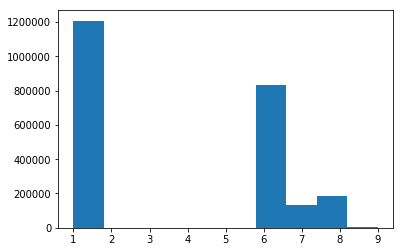

In [161]:
plt.hist(f['Z'])

In [141]:
f['R'].shape

(2358210, 3)

In [150]:
ns = np.cumsum(f['N'])

In [158]:
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

@interact(i=(0,100))
def plot_mol(i=0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*f['R'][ns[i]:ns[i+1]].T)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    ax.set_zlim(-2,2)

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

In [162]:
from lie_conv.datasets import QM9datasets

In [163]:
ds = QM9datasets()

In [167]:
len(ds[0]['train'])

100000

In [169]:
len(ds[0]['valid'])

17748

In [170]:
len(ds[0]['test'])

13083

In [180]:
ds[0]['train'][0]

{'num_atoms': tensor(18),
 'charges': tensor([6, 6, 8, 6, 6, 6, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]),
 'positions': tensor([[ 1.9178e-02,  1.5747e+00, -1.4118e-01],
         [ 6.5807e-03,  6.9741e-02,  1.9677e-03],
         [-1.1775e+00, -5.3076e-01, -4.6425e-01],
         [ 1.2793e+00, -7.3449e-01, -1.3897e-01],
         [ 5.6984e-01, -6.3585e-01,  1.2027e+00],
         [ 1.1993e+00,  8.2631e-02,  2.3819e+00],
         [ 2.1312e+00, -8.3390e-01,  3.1492e+00],
         [ 3.2708e+00, -5.7402e-01,  3.4352e+00],
         [ 9.4043e-01,  2.0175e+00,  2.4500e-01],
         [-5.9021e-02,  1.8552e+00, -1.1988e+00],
         [-8.3051e-01,  2.0184e+00,  3.8753e-01],
         [-1.2139e+00, -4.0573e-01, -1.4195e+00],
         [ 1.2205e+00, -1.6776e+00, -6.7033e-01],
         [ 2.2162e+00, -1.9848e-01, -2.5749e-01],
         [-3.3357e-03, -1.5190e+00,  1.4728e+00],
         [ 1.7679e+00,  9.6636e-01,  2.0821e+00],
         [ 4.1219e-01,  4.0838e-01,  3.0788

In [172]:
f['R']

array([[-1.26981359e-02,  1.08580416e+00,  8.00099580e-03],
       [ 2.15041600e-03, -6.03131760e-03,  1.97612040e-03],
       [ 1.01173084e+00,  1.46375116e+00,  2.76574800e-04],
       ...,
       [ 2.51585406e+00, -1.15178377e+00,  5.27369256e-01],
       [ 1.36988019e-02,  1.19943057e+00, -1.68019230e+00],
       [ 1.26074533e+00, -1.24675365e+00, -1.90676716e+00]])

In [173]:
np.max(f['N'])

[autoreload of lie_conv.datasets failed: Traceback (most recent call last):
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autorel

29

In [176]:
len(f['N'])

130831

In [178]:
f['R'].shape

[autoreload of lie_conv.datasets failed: Traceback (most recent call last):
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/marc/anaconda3/envs/default/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_w

(2358210, 3)

In [3]:
np.unique(f['Z'])

array([1, 6, 7, 8, 9], dtype=int32)

In [1]:
from lie_conv.datasets import QM9datasetsV2

In [2]:
ds = QM9datasetsV2()

In [3]:
import os
import torch
a = torch.load(os.path.expanduser('~/datasets/molecular/qm9v2/qm9_eV_processed.tensor'))

In [4]:
a.keys()

dict_keys(['positions', 'charges', 'one_hot', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'U0', 'U', 'H', 'G', 'Cv', 'num_atoms', 'index'])

In [5]:
a['positions'].shape

torch.Size([130831, 29, 3])